<a href="https://colab.research.google.com/github/furlancad/Estudo-PMF/blob/main/Corre%C3%A7%C3%A3o_Variancia_de_carteiras_de_diferentes_cardinalidades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center> Comparando a variância de carteiras de diferentes cardinalidades <center>

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

In [ ]:
dados = pd.read_excel("ibov.xlsx") #Ativos ibovespa dia 05/10/2022

In [ ]:
dados

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
0,RRRP3,3R PETROLEUM,ON NM,200453863,0.381
1,ALPA4,ALPARGATAS,PN N1,202765994,0.215
2,ABEV3,AMBEV S/A,ON,4386652506,3.253
3,AMER3,AMERICANAS,ON NM,596086291,0.526
4,ARZZ3,AREZZO CO,ON NM,60358029,0.278
...,...,...,...,...,...
87,VALE3,VALE,ON NM,4547296398,15.738
88,VIIA3,VIA,ON NM,1576975642,0.259
89,VBBR3,VIBRA,ON NM,1114442976,0.943
90,WEGE3,WEG,ON EJ NM,1481593024,2.249


In [ ]:
ativos = dados['Código'].values

In [ ]:
ativos

array(['RRRP3', 'ALPA4', 'ABEV3', 'AMER3', 'ARZZ3', 'ASAI3', 'AZUL4',
       'B3SA3', 'BPAN4', 'BBSE3', 'BRML3', 'BBDC3', 'BBDC4', 'BRAP4',
       'BBAS3', 'BRKM5', 'BRFS3', 'BPAC11', 'CRFB3', 'CCRO3', 'CMIG4',
       'CIEL3', 'COGN3', 'CPLE6', 'CSAN3', 'CPFE3', 'CMIN3', 'CVCB3',
       'CYRE3', 'DXCO3', 'ECOR3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3',
       'ENGI11', 'ENEV3', 'EGIE3', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4',
       'GOAU4', 'GOLL4', 'NTCO3', 'SOMA3', 'HAPV3', 'HYPE3', 'IGTI11',
       'IRBR3', 'ITSA4', 'ITUB4', 'JBSS3', 'KLBN11', 'RENT3', 'LWSA3',
       'LREN3', 'MGLU3', 'MRFG3', 'CASH3', 'BEEF3', 'MRVE3', 'MULT3',
       'PCAR3', 'PETR3', 'PETR4', 'PRIO3', 'PETZ3', 'POSI3', 'QUAL3',
       'RADL3', 'RAIZ4', 'RDOR3', 'RAIL3', 'SBSP3', 'SANB11', 'SMTO3',
       'CSNA3', 'SLCE3', 'SULA11', 'SUZB3', 'TAEE11', 'VIVT3', 'TIMS3',
       'TOTS3', 'UGPA3', 'USIM5', 'VALE3', 'VIIA3', 'VBBR3', 'WEGE3',
       'YDUQ3'], dtype=object)

In [ ]:
QTD_ATIVOS = ativos.size

In [ ]:
data_inicial = '2021-01-01'
data_final = '2022-01-31'

In [ ]:
fechamentos = yf.download(tickers=(ativos+'.SA').tolist(), start=data_inicial, end = data_final, rounding=True)['Adj Close']
fechamentos.columns = fechamentos.columns.str.rstrip('.SA')
retornos = fechamentos.pct_change()

[*********************100%***********************]  92 of 92 completed

2 Failed downloads:
- SULA11.SA: No timezone found, symbol may be delisted
- BRML3.SA: No timezone found, symbol may be delisted


In [ ]:
retornos.head()

,ABEV3,ALPA4,AMER3,ARZZ3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC3,BBDC4,...,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VBBR3,VIIA3,VIVT3,WEGE3,YDUQ3
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05 00:00:00,0.021292,0.000486,-0.022346,-0.015246,NaN,0.012457,0.001638,-0.010329,-0.004632,-0.006166,...,-0.022377,-0.004783,-0.008478,0.011218,0.016856,0.011029,0.003092,-0.008485,0.061423,0.005119
2021-01-06 00:00:00,0.020153,-0.054356,-0.065306,-0.059142,NaN,-0.040052,-0.016349,0.022831,0.025015,0.033092,...,-0.027624,-0.047320,-0.012151,0.048336,0.032871,-0.014545,-0.045006,-0.011151,0.026709,-0.039844
2021-01-07 00:00:00,-0.005450,-0.017963,-0.020234,-0.001316,NaN,-0.016908,0.028255,0.039541,0.024404,0.026527,...,-0.016234,-0.002716,0.030524,0.047619,0.065295,0.018450,-0.026469,-0.025439,0.041316,0.012480
2021-01-08 00:00:00,0.030137,0.051738,0.069678,0.018784,NaN,0.015257,0.014547,0.005828,-0.007756,-0.008776,...,0.045380,0.066537,0.026083,-0.004329,-0.003219,0.027950,0.029841,0.026103,0.060495,0.034206


In [ ]:
# FILTRANDO OS ATIVOS COM VARIOS VALORES NULOS
colunas_com_mais_de_um_na = retornos.columns[retornos.isna().sum() > 1]
retornos_filtrados = retornos[colunas_com_mais_de_um_na]
excluir_ativos = list(retornos_filtrados.columns)

retornos = retornos.drop(excluir_ativos, axis=1)

In [ ]:
# DEFININDO A PRIMEIRA COLUNA COMO 0
retornos= retornos.fillna(0)

In [ ]:
# Redefinindo ativos
ativos = list(retornos.columns)

In [ ]:
len(ativos)

86

In [ ]:
len(retornos.columns)

86

In [ ]:
aux = np.random.rand(5,1)[:,0]

In [ ]:
aux

array([0.78295487, 0.92933997, 0.55478476, 0.58663815, 0.02605681])

In [ ]:
peso = aux/sum(aux)

In [ ]:
peso

array([0.27188061, 0.32271275, 0.19264868, 0.20370975, 0.00904821])

In [ ]:
peso.sum().round(1)

1.0

In [ ]:
# Redefinindo quantidade de ativos
QTD_ATIVOS = len(retornos.columns)

In [ ]:
def calcula_cov(QTD_ATIVOS,retornos, ativos):
    variancia = []
    for quantidade in range(2,QTD_ATIVOS,2):
        aux = np.random.rand(quantidade,1)[:,0]
        peso = aux/sum(aux)
        variancia.append((peso.dot(retornos[ativos[:quantidade]].cov())).dot(peso))
    return variancia

In [ ]:
variancias = calcula_cov(QTD_ATIVOS,retornos, ativos)

In [ ]:
QTD_ATIVOS

86

In [ ]:
range(2,QTD_ATIVOS,2)

range(2, 86, 2)

In [ ]:
variancias

[0.000335276927822045,
 0.0003696114425568916,
 0.00031844521201095403,
 0.00034122094169352664,
 0.000274532211843003,
 0.00023786949934894927,
 0.0002234216025768313,
 0.0002454078244228102,
 0.0002689316717992722,
 0.0002325573780338614,
 0.0002770490069964192,
 0.00020965699327677714,
 0.00021678751796345554,
 0.00023506601136957203,
 0.0002509713950376237,
 0.0002890942285771696,
 0.00023849172212414137,
 0.00023927724699068477,
 0.00021456993457419845,
 0.00023685799077826673,
 0.00023806761799865993,
 0.00025135042157967266,
 0.00022317824078821083,
 0.00022518896324366232,
 0.0002320565431248882,
 0.00021093639952922516,
 0.00024878625092157066,
 0.00021217264979875183,
 0.00021556299221893536,
 0.00022080807244864446,
 0.0002270501414247591,
 0.00020994859670315282,
 0.0002229853534318703,
 0.00020794366109074425,
 0.00020266346069920698,
 0.00022940802983561129,
 0.00021218731630750348,
 0.00019430365475394778,
 0.00019696993442346367,
 0.00021585713602439912,
 0.000194599575

In [ ]:
retornos[ativos[:3]].cov()

,ABEV3,ALPA4,AMER3
ABEV3,0.000346,0.000132,0.000171
ALPA4,0.000132,0.000740,0.000361
AMER3,0.000171,0.000361,0.001401


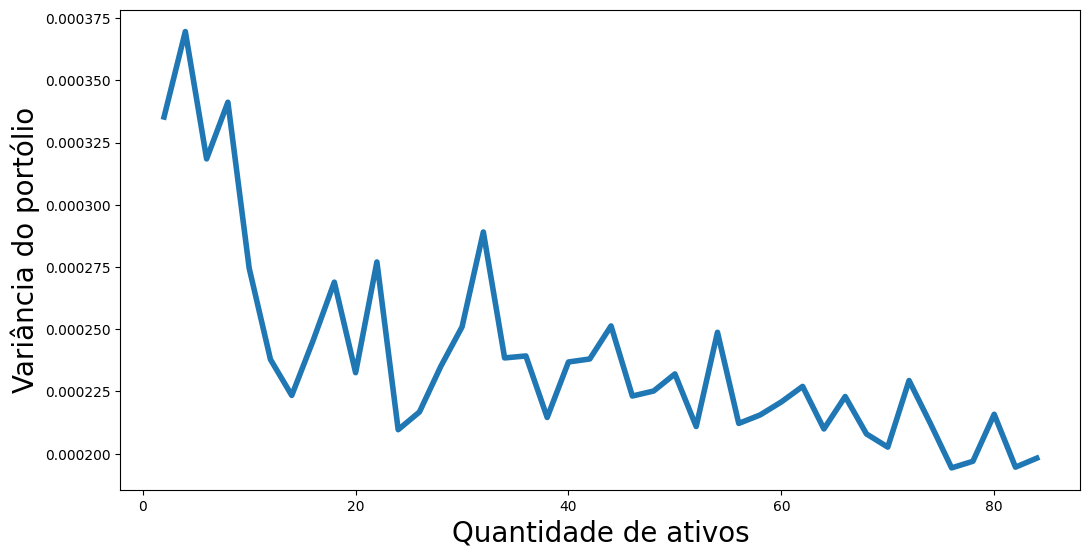

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(range(2,QTD_ATIVOS,2),variancias, linewidth = 4,label="Renda Variável")
ax1.set_xlabel('Quantidade de ativos', fontsize=20)
ax1.set_ylabel("Variância do portólio", fontsize=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=20)
plt.show();